# DEcision Tree model on iris Penguine dataset

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv("Iris penguine data.csv")
data.tail()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Biscoe,N38A2,12/1/2009,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Biscoe,N39A1,11/22/2009,46.8,14.3,215,4850,FEMALE,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Biscoe,N39A2,11/22/2009,50.4,15.7,222,5750,MALE,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Biscoe,N43A1,11/22/2009,45.2,14.8,212,5200,FEMALE,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Biscoe,N43A2,11/22/2009,49.9,16.1,213,5400,MALE,NaN


#### data information

* Species is dependent feature

In [58]:
species=data.Species.value_counts().keys().tolist()


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [60]:
data.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In this model irrelevent columns are studyName, Sample Number,Individual ID,Date Egg,Comments.

In [61]:
data.drop(['studyName', 'Sample Number','Comments','Individual ID','Date Egg'],axis=1,inplace=True)

In [62]:
data.loc[data.isna().any(axis=1)]

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,34.1,18.1,193,3475,NaN
9,Adelie Penguin (Pygoscelis adeliae),Torgersen,42.0,20.2,190,4250,NaN
10,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.1,186,3300,NaN
11,Adelie Penguin (Pygoscelis adeliae),Torgersen,37.8,17.3,180,3700,NaN
47,Adelie Penguin (Pygoscelis adeliae),Dream,37.5,18.9,179,2975,NaN
246,Gentoo penguin (Pygoscelis papua),Biscoe,44.5,14.3,216,4100,NaN
286,Gentoo penguin (Pygoscelis papua),Biscoe,46.2,14.4,214,4650,NaN
324,Gentoo penguin (Pygoscelis papua),Biscoe,47.3,13.8,216,4725,NaN
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,NaN,NaN,NaN,NaN


In [63]:
data.info(), data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


(None,
 Species                 0
 Island                  0
 Culmen Length (mm)      2
 Culmen Depth (mm)       2
 Flipper Length (mm)     2
 Body Mass (g)           2
 Sex                    10
 dtype: int64)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [65]:
data.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


column 'Flipper Length (mm)' and 'Body Mass (g)' have irrelevent value such as '.'
because of it datatype changed to object.

In [66]:
data['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [67]:
# wherever '.' present make it nan
data['Body Mass (g)']  = np.where(data['Body Mass (g)'] == '.',np.nan,data['Body Mass (g)'])

In [68]:
# convert it to numeric datatype
data['Body Mass (g)'] = pd.to_numeric(data['Body Mass (g)'])

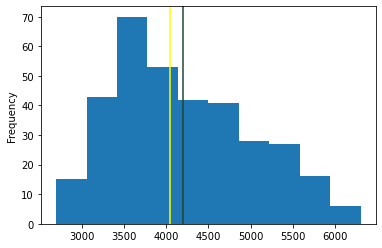

In [69]:
data['Body Mass (g)'].plot.hist()
plt.axvline(x=data['Body Mass (g)'].mean(),color='#243')
plt.axvline(x=data['Body Mass (g)'].median(),color='yellow');

# fill the median value
data['Body Mass (g)'] =data['Body Mass (g)'].fillna(data['Body Mass (g)'].median())

How to find a perticuler value in a column

In [70]:
data[data['Flipper Length (mm)']=='.']

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250.0,FEMALE


In [71]:
data['Flipper Length (mm)'].describe()

count     342
unique     56
top       190
freq       22
Name: Flipper Length (mm), dtype: object

In [72]:
data['Flipper Length (mm)'] = np.where(data['Flipper Length (mm)']=='.',np.nan,data['Flipper Length (mm)'])
data['Flipper Length (mm)'] = pd.to_numeric(data['Flipper Length (mm)'])

#after converting into numeric check the statistical measurement
data['Flipper Length (mm)'].describe()

count    341.000000
mean     200.932551
std       14.078712
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64

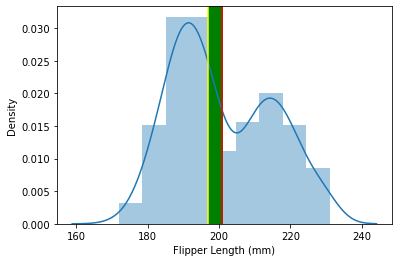

In [73]:
sns.distplot(data['Flipper Length (mm)'])
plt.axvline(x=data['Flipper Length (mm)'].mean(),color='red')
plt.axvspan(data['Flipper Length (mm)'].mean(),data['Flipper Length (mm)'].median(),color='green')
plt.axvline(x=data['Flipper Length (mm)'].median(),color='yellow')

# fill the median value
data['Flipper Length (mm)']= data['Flipper Length (mm)'].fillna(data['Flipper Length (mm)'].median());

Checking the OUtliers

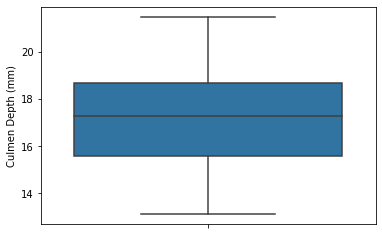

In [74]:
sns.boxplot(y=data['Culmen Depth (mm)']);

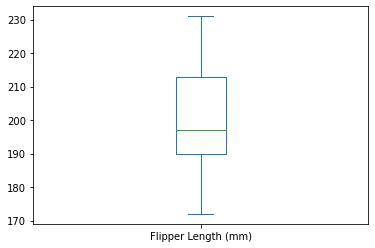

In [75]:
data['Flipper Length (mm)'].plot.box();

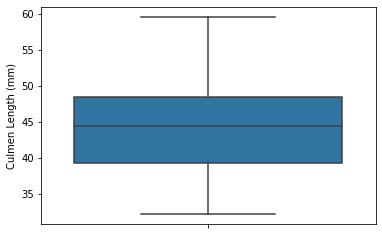

In [76]:
sns.boxplot(y=data['Culmen Length (mm)']);

In [77]:
data.isna().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

Treat nan values

In [78]:
data['Culmen Depth (mm)']=data['Culmen Depth (mm)'].fillna(data['Culmen Depth (mm)'].median())
data['Culmen Length (mm)'] = data['Culmen Length (mm)'].fillna(data['Culmen Length (mm)'].median())

In [79]:
data.Sex.unique(), data.Sex.value_counts()

(array(['MALE', 'FEMALE', nan, '.'], dtype=object),
 MALE      168
 FEMALE    165
 .           1
 Name: Sex, dtype: int64)

In [80]:
# remove the '.' 
data.Sex = np.where(data.Sex=='.',np.nan,data.Sex)

# check the description
data.Sex.describe()

count      333
unique       2
top       MALE
freq       168
Name: Sex, dtype: object

In [81]:
# fillna with highest frequently occured datapoint
data.Sex= data.Sex.fillna('MALE')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Treat object features

In [83]:
# Convert dependent variable features into codes
data.Species = data.Species.astype('category')
data.Species = data.Species.cat.codes

In [84]:
# independent variable into one-hot-Encode

data.Sex = data.Sex.astype('category')
data.Sex = data.Sex.cat.codes

data.Island = data.Island.astype('category')
data.Island = data.Island.cat.codes

data = pd.get_dummies(data,columns=['Sex','Island'],drop_first=True)


Male is: 179
Female is: 165


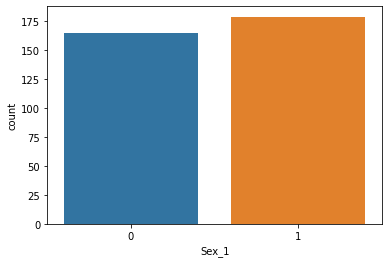

In [85]:
sns.countplot(data.Sex_1)
male,female = data.Sex_1.value_counts()
print(f'Male is: {male}\nFemale is: {female}');

In [86]:
data

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex_1,Island_1,Island_2
0,0,39.10,18.7,181.0,4050.0,1,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,1
2,0,40.30,18.0,197.0,3250.0,0,0,1
3,0,44.45,17.3,197.0,4050.0,1,0,1
4,0,36.70,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...,...
339,2,44.45,17.3,197.0,4050.0,1,0,0
340,2,46.80,14.3,215.0,4850.0,0,0,0
341,2,50.40,15.7,222.0,5750.0,1,0,0
342,2,45.20,14.8,212.0,5200.0,0,0,0


0 count is: 152
1 count is: 124
2 count is: 68


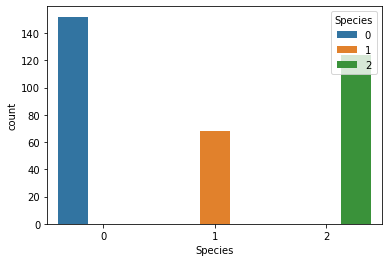

In [87]:
# see the dependent variable vlaue distribution
sns.countplot(data.Species,hue=data.Species)
blue,orange,green =data.Species.value_counts()
print(f"0 count is: {blue}\n1 count is: {orange}\n2 count is: {green}");

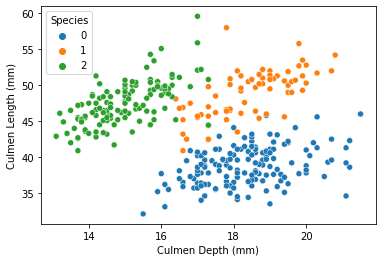

In [88]:
sns.scatterplot(x='Culmen Depth (mm)',y='Culmen Length (mm)',data=data,hue='Species',palette='tab10');

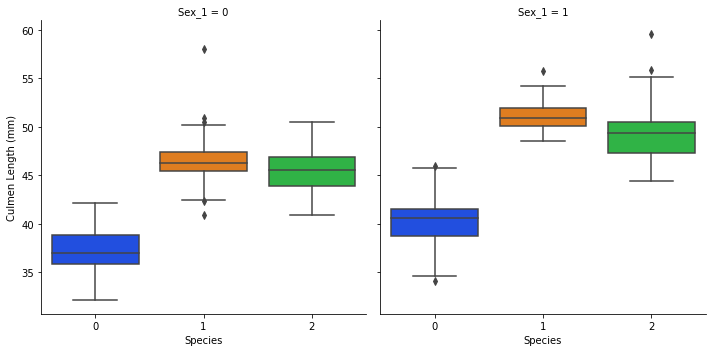

In [89]:
sns.catplot(data=data,x='Species',y='Culmen Length (mm)',kind='box',col='Sex_1',palette='bright');

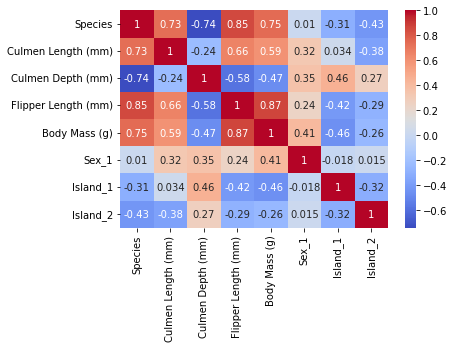

In [90]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');


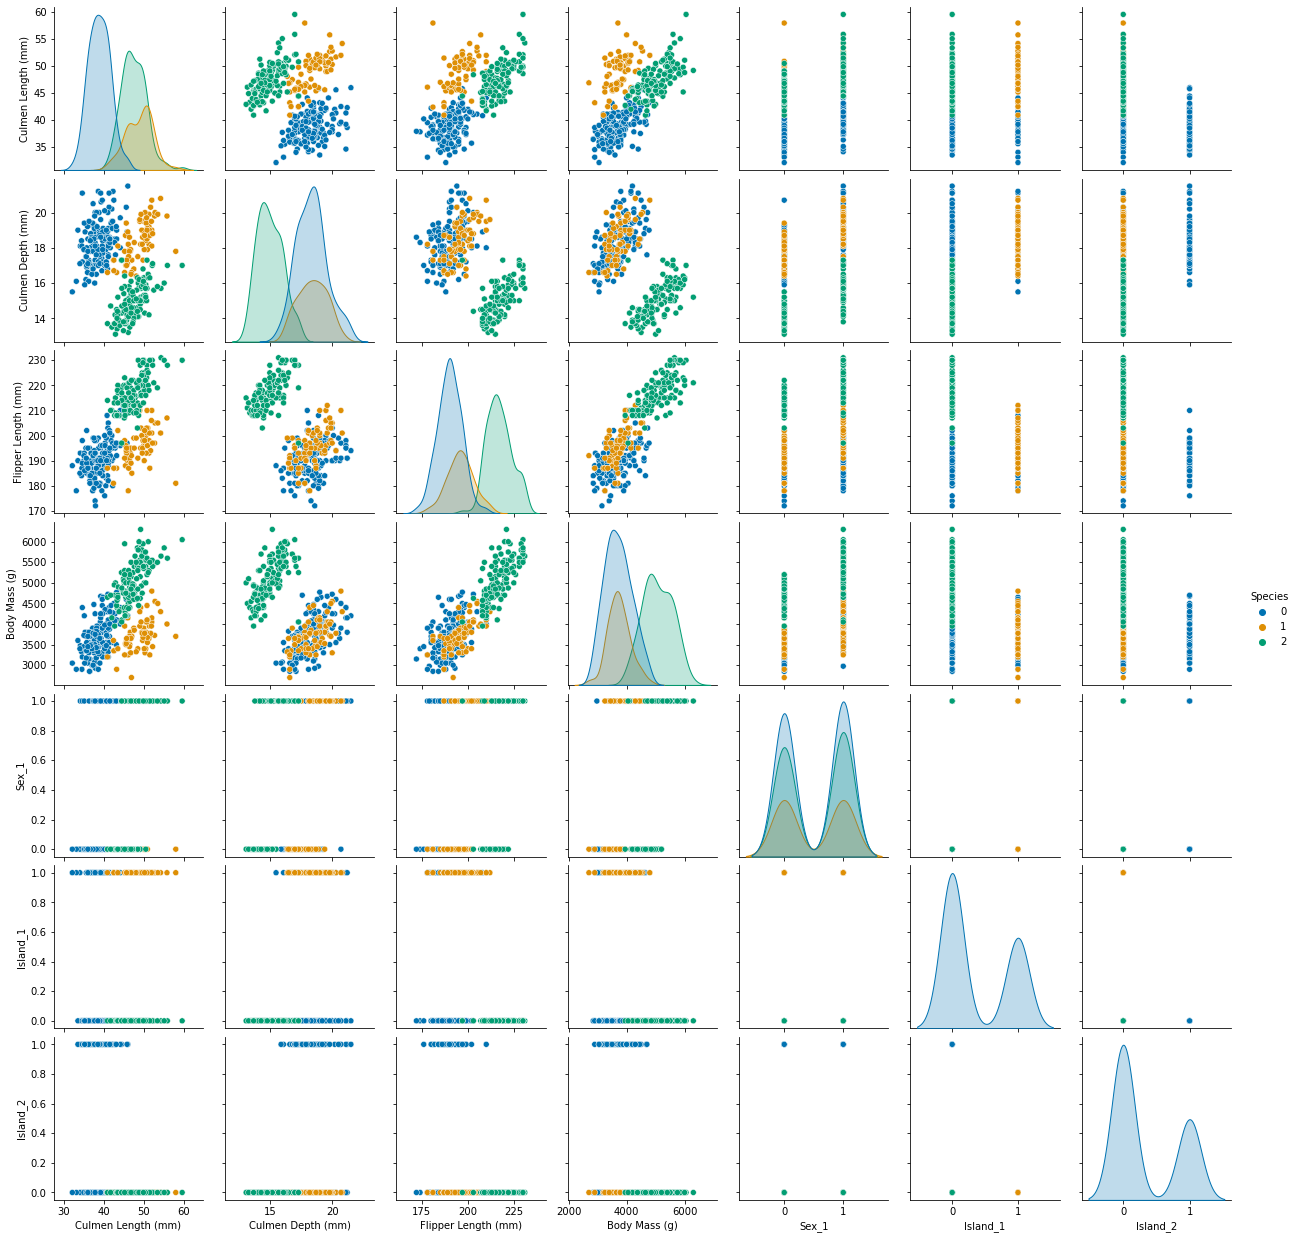

In [91]:
sns.pairplot(data,hue='Species',palette='colorblind');

In [92]:
# It's time to split the data into train and test

Y = data.iloc[:,0]
X =data.iloc[:,1:]

X

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex_1,Island_1,Island_2
0,39.10,18.7,181.0,4050.0,1,0,1
1,39.50,17.4,186.0,3800.0,0,0,1
2,40.30,18.0,197.0,3250.0,0,0,1
3,44.45,17.3,197.0,4050.0,1,0,1
4,36.70,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,1,0,0
340,46.80,14.3,215.0,4850.0,0,0,0
341,50.40,15.7,222.0,5750.0,1,0,0
342,45.20,14.8,212.0,5200.0,0,0,0


In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=102)

print(f"x-train is {xtrain.shape}\ny-train is {ytrain.shape}")

x-train is (258, 7)
y-train is (258,)


#### DT Model building 

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt2 = DecisionTreeClassifier(criterion='entropy')

dt1.fit(xtrain,ytrain)
dt2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

##### Predtiction m

In [95]:
dt1_pre = dt1.predict(xtest)
dt2_pre = dt2.predict(xtest)

In [96]:
dt1_pred =dt1.predict(xtrain)
dt2_pred = dt2.predict(xtrain)

Classification score card

In [97]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [98]:
print(classification_report(ytrain,dt1_pred))

# Training evaluation report using 'gini' criterion

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        94

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258




### If dataset have data imbalance, look at precion and recall not on Accuracy

In [99]:
print("# testing evaluation report using 'gini' criterion:\n",classification_report(ytest,dt1_pre),"-"*59)
# testing evaluation report using 'gini' criterion


print("# testing evaluation report using 'Entropy' criterion:\n",classification_report(ytest,dt2_pre))
# testing evaluation report using 'Entropy' criterion

# testing evaluation report using 'gini' criterion:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86
 -----------------------------------------------------------
# testing evaluation report using 'Entropy' criterion:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        30

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



accuracy_score for testing:  0.9883720930232558


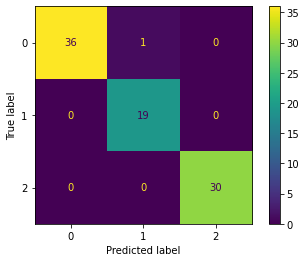

In [100]:
print("accuracy_score for testing: ",accuracy_score(ytest,dt1_pre))

plot_confusion_matrix(dt1,xtest,ytest)
plt.show()

accuracy_score for training:  1.0


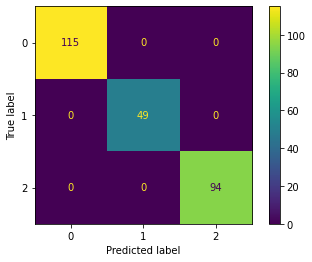

In [101]:
print("accuracy_score for training: ",accuracy_score(ytrain,dt1_pred))

plot_confusion_matrix(dt1,xtrain,ytrain)
plt.show()

#### lets see Information gain of each feature


In [102]:
feature_info = dt1.feature_importances_
f_info = pd.DataFrame(data=feature_info,index=X.columns,columns=['Important Features'])
f_info

,Important Features
Culmen Length (mm),0.330547
Culmen Depth (mm),0.064773
Flipper Length (mm),0.526651
Body Mass (g),0.008171
Sex_1,0.037176
Island_1,0.026555
Island_2,0.006128


##### This means that 'Body Mass (g)' feature not playing any role here, it's insignificunt variable

#### Draw DecisionTree for this dataset

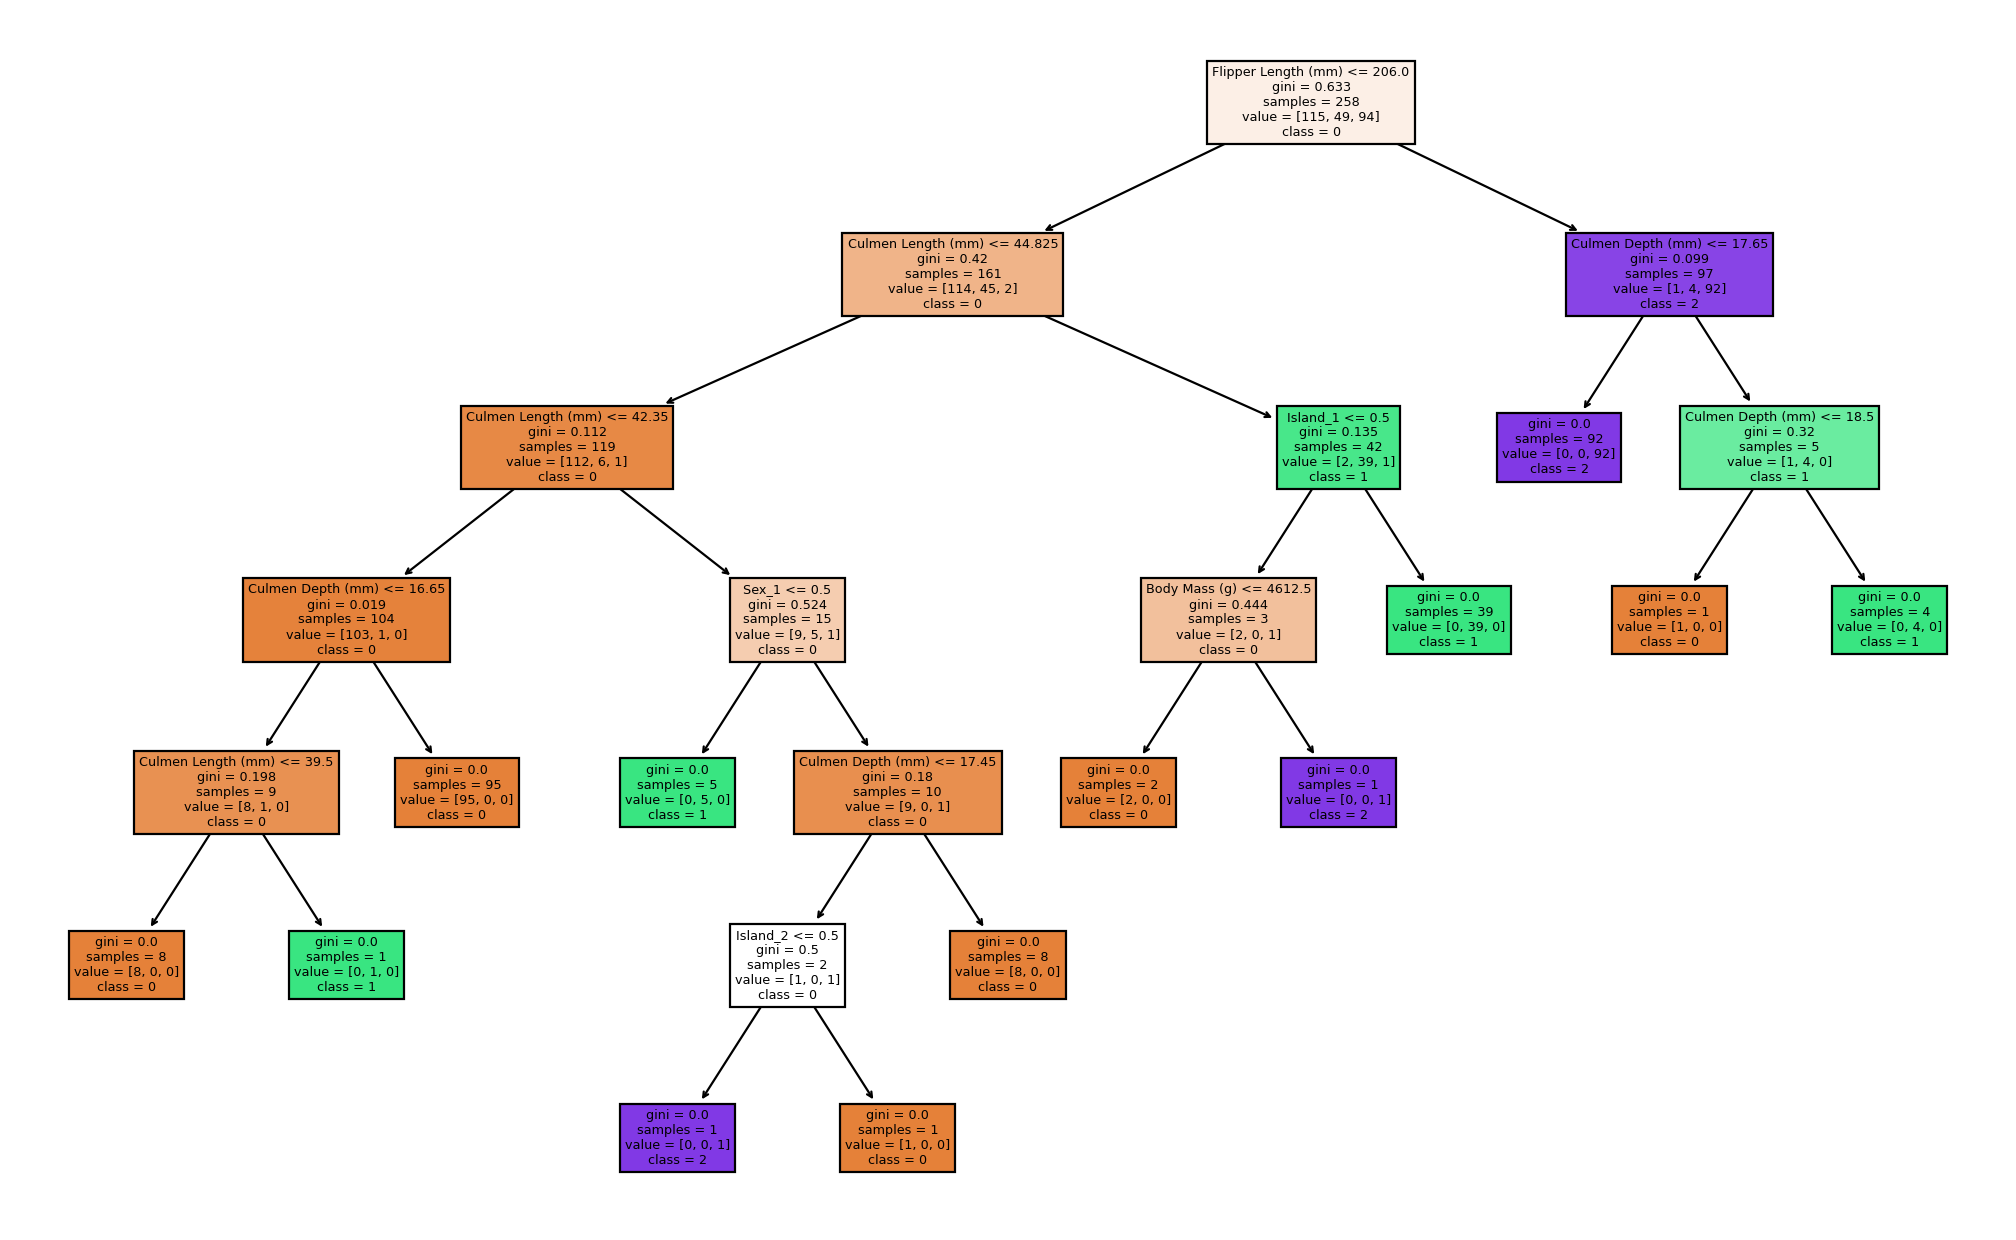

In [103]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10),dpi=160)
plot_tree(dt1,feature_names=X.columns,class_names=['0','1','2'],filled=True)
plt.show()

#### Pruining is important step to increase DT prediction


In [104]:
def report_dt(model):

    # model prediction
    model_pred = model.predict(xtest)
    model_pred_train = model.predict(xtrain)
    
    # accuracy of training
    print("train_accuracy is: ",accuracy_score(ytrain,model_pred_train))
    
    # accuracy of testing model
    print("test_accuracy is: ",accuracy_score(ytest,model_pred))
    
    # classification report 
    print(classification_report(ytest,model_pred),'\n')
    
    # Decision Tree plot
    plt.figure(figsize=(12,8),dpi=160)
    plot_tree(model,filled=True,feature_names=X.columns)

This dataset prediction is totally fine but lets check for any possiblity to increase accuracy by post pruining

In [105]:
post_pruine1 = DecisionTreeClassifier(max_depth=4,splitter='random',min_samples_split=5,min_samples_leaf=2)
post_pruine1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       splitter='random')

train_accuracy is:  0.9573643410852714
test_accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86
 



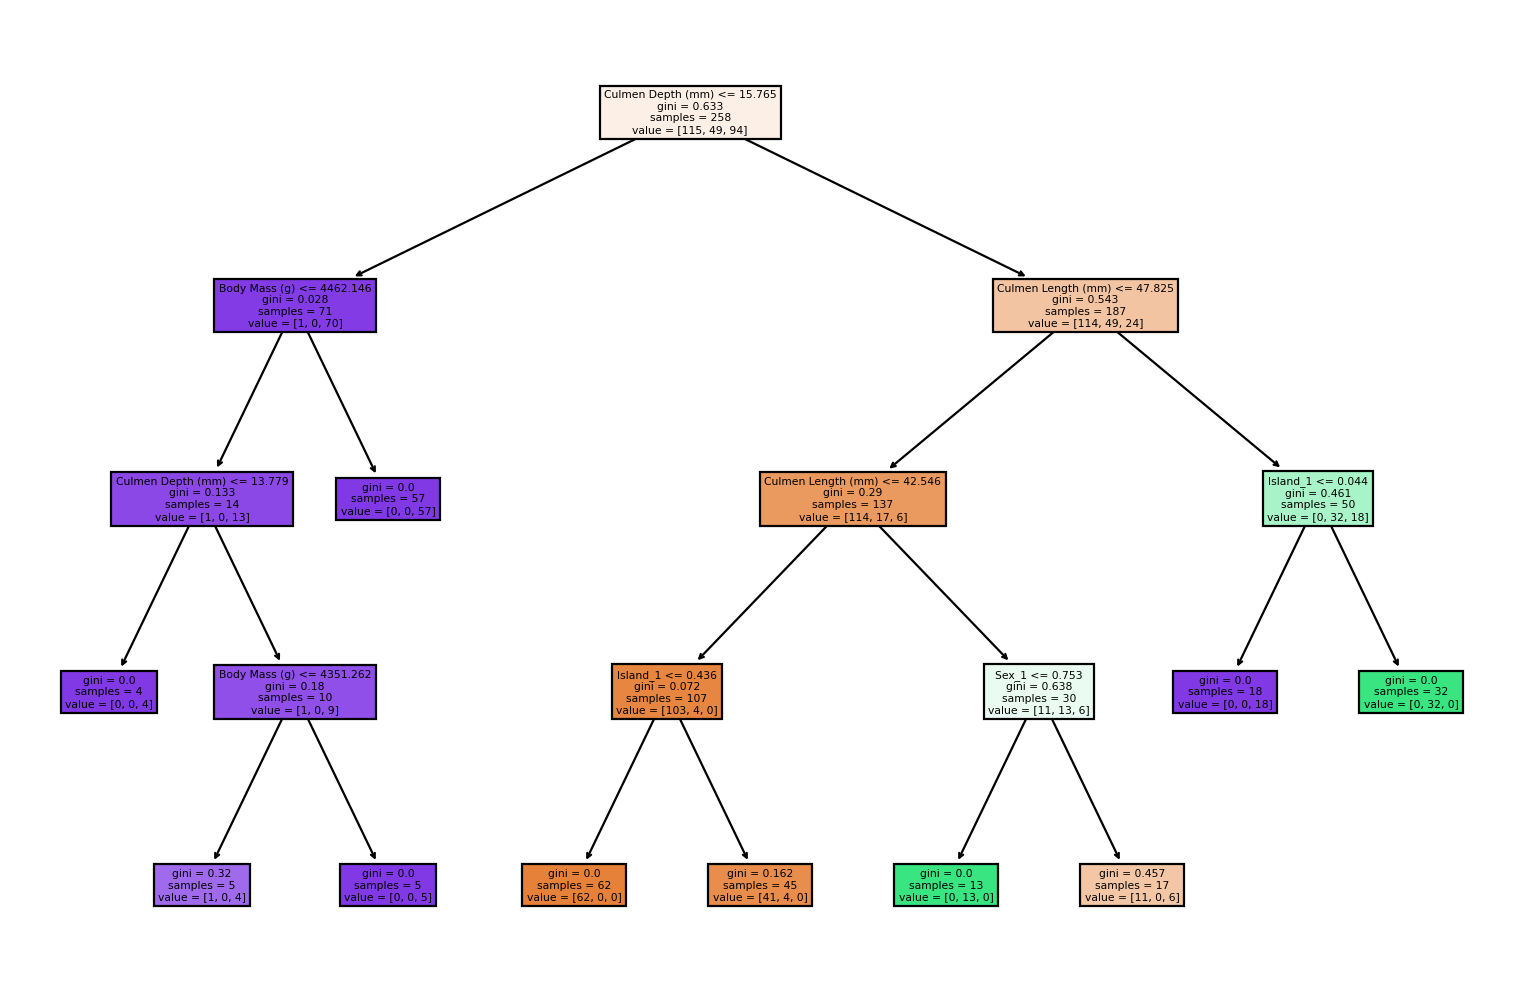

In [106]:
# Lets seee the result after post pruinig
report_dt(post_pruine1)

In [107]:
post_pruine2 = DecisionTreeClassifier(max_depth=6,min_samples_leaf=2)
post_pruine2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

train_accuracy is:  0.9844961240310077
test_accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86
 



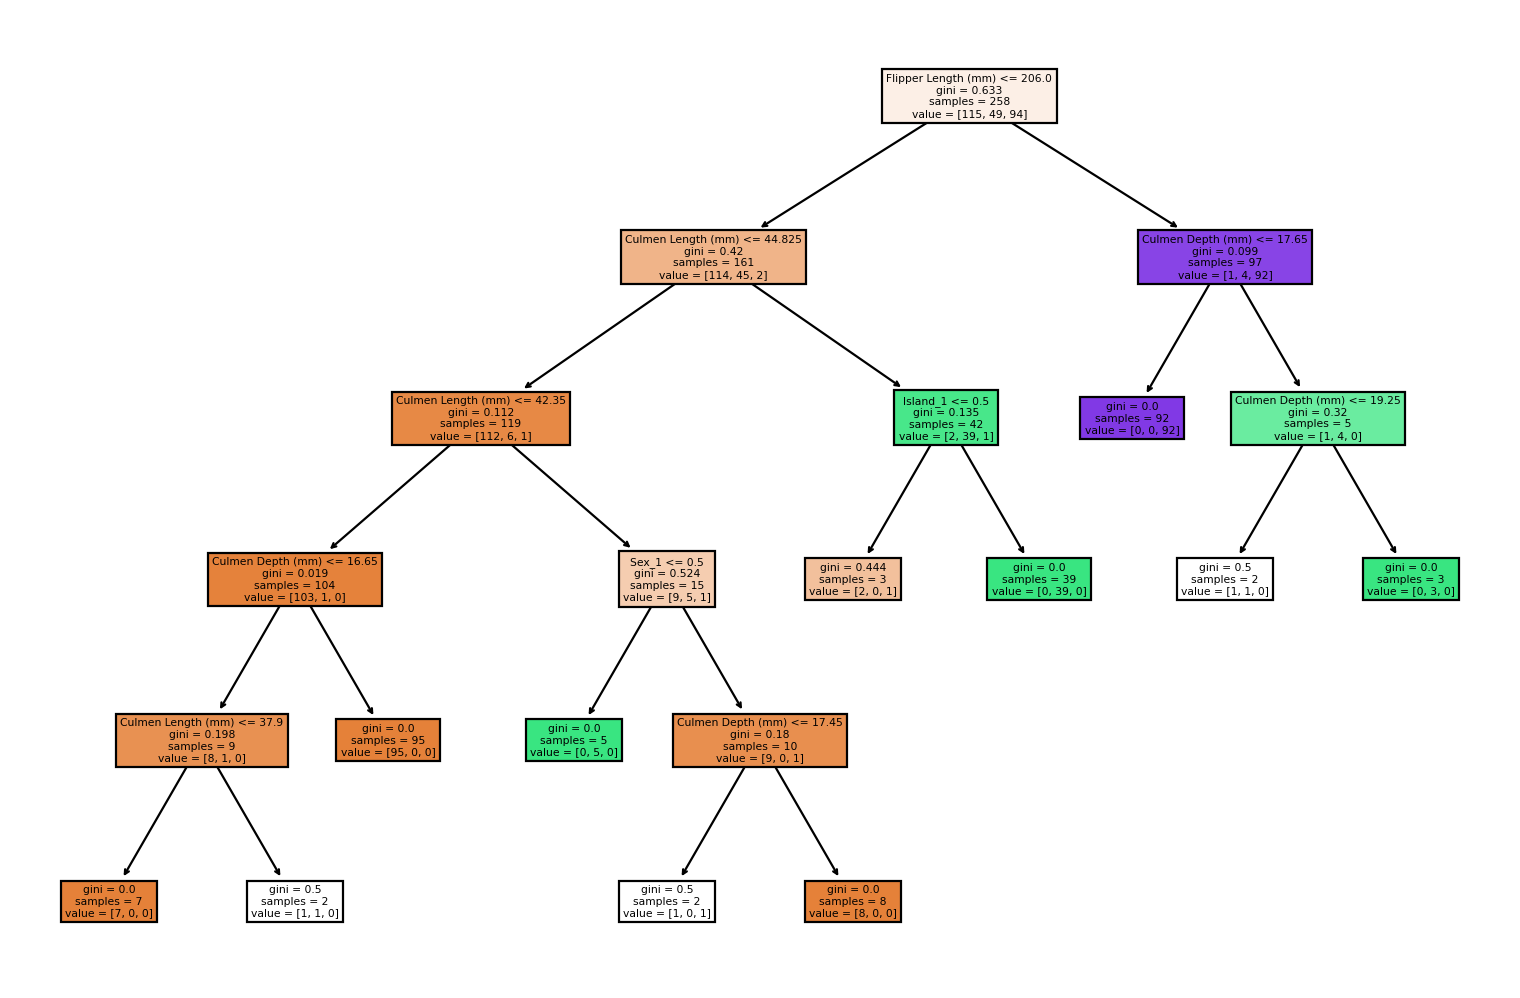

In [108]:
report_dt(post_pruine2)